In [51]:
# First we will import the necessary Library
#1
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [52]:
# Load our dataset
maindf=pd.read_csv('/content/BTC-USD.csv')

In [53]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  367
Total number of fields present in the dataset:  7


In [54]:
maindf.shape

(367, 7)

In [55]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
1,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
2,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
3,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
4,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380


In [56]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,25230851763
363,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,17130241883
364,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,20050941373
365,2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,34873527352
366,2024-04-02,69694.046875,69694.046875,64610.968750,65093.867188,65093.867188,48699375616


In [57]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


In [58]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,36566.133366,37245.166175,35951.784331,36667.095315,36667.095315,2.054246e+10
std,12297.066565,12727.681790,11862.108972,12379.663729,12379.663729,1.347272e+10
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,27552.037110,27984.726562,27100.661133,27557.231445,27557.231445,1.216358e+10
50%,30315.976563,30636.029297,29966.386719,30318.496094,30318.496094,1.649319e+10
75%,42649.451172,43357.119140,41852.763672,42700.660157,42700.660157,2.387294e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


In [59]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [60]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [61]:
# Final shape of the dataset after dealing with null values

maindf.shape

(367, 7)

In [62]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2023-04-02
Ending Date 2024-04-02


In [63]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-03-30')
                     & (maindf['Date'] < '2023-12-30')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594
1,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703
2,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844
3,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375
4,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625
...,...,...,...,...,...
267,2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625
268,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344
269,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469
270,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469


In [64]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,28835.928273,28872.972454
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [65]:
#Monthwise comparision between Stock open and close price
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [66]:
#Monthwise High and Low stock price
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [67]:
#Stock analysis chart
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])
fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date', 'value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [68]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2024 = maindf.loc[(maindf['Date'] >= '2024-01-01')
                     & (maindf['Date'] < '2024-03-30')]

y_2024.drop(y_2024[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
274,2024-01-01,42280.234375,44175.437500,42214.976563,44167.332031
275,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750
276,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781
277,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875
278,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406
...,...,...,...,...,...
358,2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500
359,2024-03-26,69931.328125,71535.742188,69335.609375,69987.835938
360,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750
361,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125


In [69]:
monthvise= y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67207.382678,67510.229795
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [70]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [71]:
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2024.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [72]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2024, x=y_2024.Date, y=[y_2024['Open'], y_2024['Close'],
                                          y_2024['High'], y_2024['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [73]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2023-03-30')
                     & (maindf['Date'] <= '2024-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594
1,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703
2,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844
3,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375
4,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625
...,...,...,...,...,...
359,2024-03-26,69931.328125,71535.742188,69335.609375,69987.835938
360,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750
361,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125
362,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125


In [74]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67296.918099,67581.398959
April,28835.928273,28872.972454
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [75]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [76]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (367, 2)


In [77]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2023-2024', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [78]:
closedf = closedf[closedf['Date'] > '2023-03-30']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  367


In [79]:
closedf

,Date,Close
0,2023-04-02,28199.308594
1,2023-04-03,27790.220703
2,2023-04-04,28168.089844
3,2023-04-05,28177.984375
4,2023-04-06,28044.140625
...,...,...
362,2024-03-29,69892.828125
363,2024-03-30,69645.304688
364,2024-03-31,71333.648438
365,2024-04-01,69702.148438


In [80]:
fig = px.line(closedf, x="Date", y="Close", labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [81]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(367, 1)


In [82]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (220, 1)
test_data:  (147, 1)


In [83]:
#2
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [84]:
time_step = 15              #15 days
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
X_train:  (203, 15)
y_train:  (203,)
X_test:  (130, 15)
y_test: (130,)

X_train:  (204, 15)
y_train:  (204,)
X_test:  (131, 15)
y_test (131,)


In [85]:
#3
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (204, 15, 1)
X_test:  (131, 15, 1)


In [86]:
#4
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [87]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 56ms/step - loss: 0.0072 - val_loss: 0.3424
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0049 - val_loss: 0.3104
Epoch 3/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.2842
Epoch 4/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0028 - val_loss: 0.2636
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.2490
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0024 - val_loss: 0.2412
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.2363
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.2319
Epoch 9/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 0.2266
Epoch 10/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 0.2174
Epoch 11/200
7/7 [=

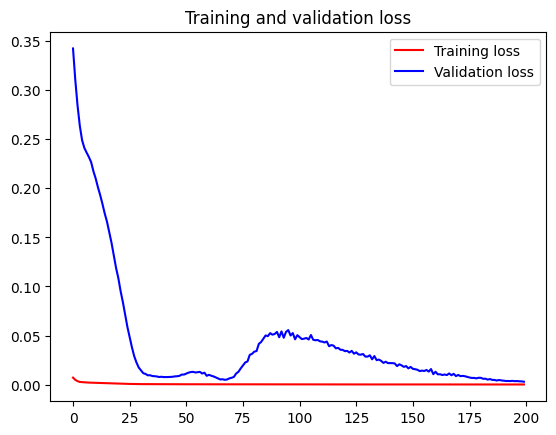

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [89]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 4ms/step


((204, 1), (131, 1))

In [90]:
#5
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [91]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  637.6668322860229
Train data MSE:  406618.98899769085
Train data MAE:  435.09106922977946
-------------------------------------------------------------------------------------
Test data RMSE:  2619.887628880605
Test data MSE:  6863811.187961638
Test data MAE:  1860.8150943454202


In [92]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.92379317218661
Test data explained variance regression score: 0.9626164202232317


In [93]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9236018828183752
Test data R2 score: 0.9432139831603675


In [94]:
# Investigate the data
print("Train data shape: ", original_ytrain.shape)
print("Test data shape: ", original_ytest.shape)
print("Train predictions shape: ", train_predict.shape)
print("Test predictions shape: ", test_predict.shape)

# Check for negative values
print("Train data negatives: ", np.sum(original_ytrain <= 0))
print("Test data negatives: ", np.sum(original_ytest <= 0))
print("Train predictions negatives: ", np.sum(train_predict <= 0))
print("Test predictions negatives: ", np.sum(test_predict <= 0))

# Fix the issue by clipping negative values to a small positive value
epsilon = 1e-8
train_predict = np.clip(train_predict, epsilon, None)
test_predict = np.clip(test_predict, epsilon, None)

# Calculate the metrics again
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data shape:  (204, 1)
Test data shape:  (131, 1)
Train predictions shape:  (204, 1)
Test predictions shape:  (131, 1)
Train data negatives:  0
Test data negatives:  0
Train predictions negatives:  0
Test predictions negatives:  0
Train data MGD:  0.0004956683422095704
Test data MGD:  0.0023819973053527967
----------------------------------------------------------------------
Train data MPD:  14.162046550244792
Test data MPD:  125.50994940645664


In [95]:
#6
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (367, 1)
Test predicted data:  (367, 1)


In [96]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1
        print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  1


In [97]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [98]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [99]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [100]:
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

